# CASE STUDY: IRIS PLANT CLASSIFICATION USING K-NEAREST NEIGHBORS
# Dr. Ryan @STEMplicity
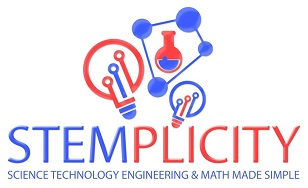




# STEP #0: PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features: 
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes represneting class label of iris flower {1,2,3} 
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

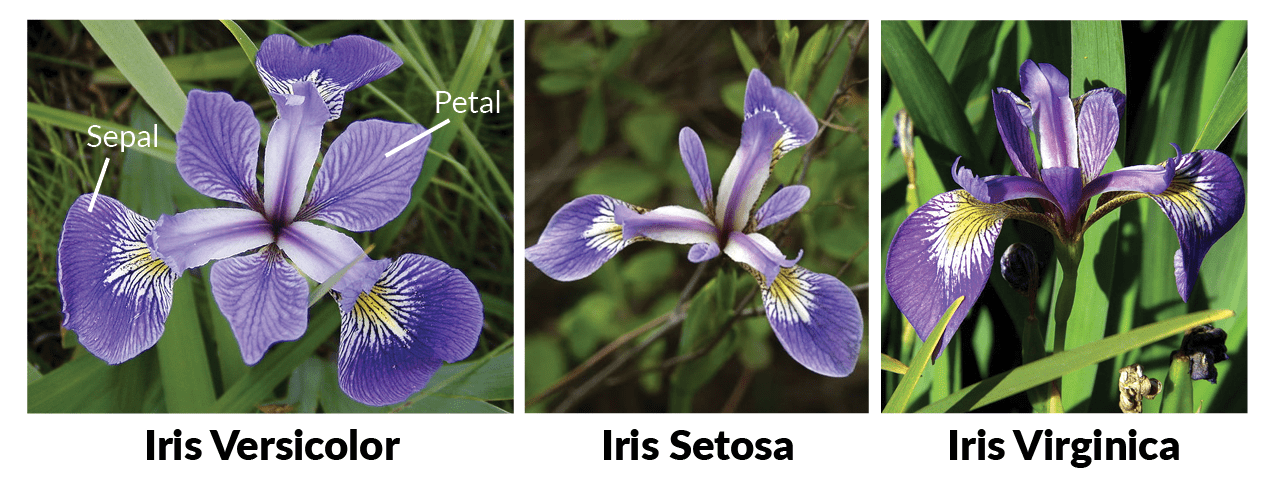


# STEP #1: IMPORTING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# STEP #2: EXPLORING THE DATASET  

In [4]:
# Let's view the head of the training dataset
df.head()




,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Let's view the last elements in the training dataset
df.tail()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.shape

(150, 5)

In [8]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [10]:
?sns.pairplot

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
y = le.fit_transform(df.Species)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

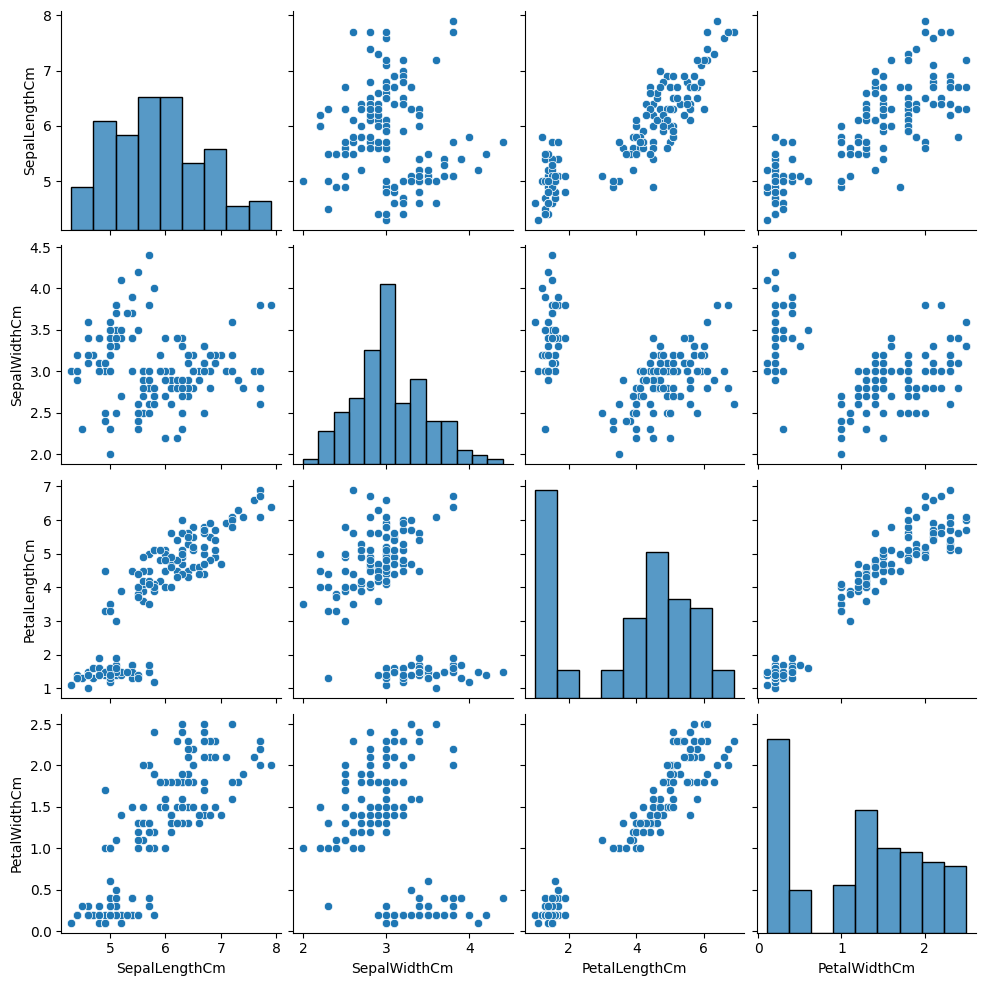

In [13]:
vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
sns.pairplot(vars=vars, data=df)

In [14]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

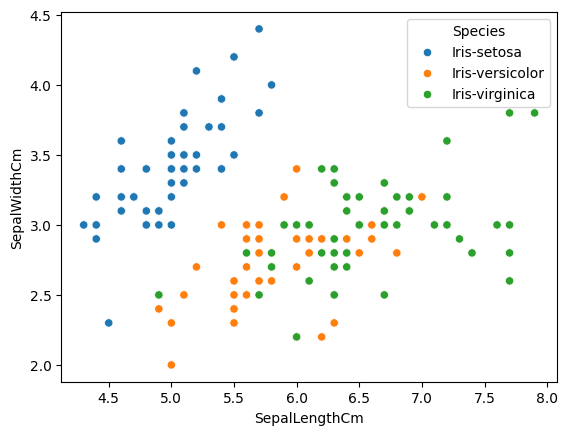

In [15]:
sns.scatterplot(x='SepalLengthCm', y ='SepalWidthCm', data=df, hue='Species')

In [16]:

'PetalLengthCm', 'PetalWidthCm'



('PetalLengthCm', 'PetalWidthCm')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

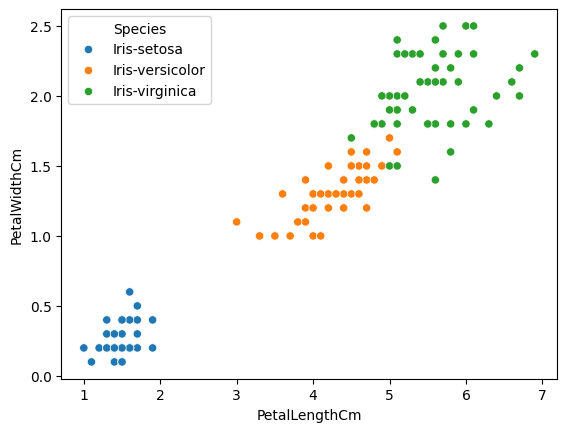

In [17]:
sns.scatterplot(x='PetalLengthCm', y= 'PetalWidthCm', data=df, hue='Species')

In [18]:
?sns.violinplot

Signature:
sns.violinplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    inner='box',
    split=False,
    width=0.8,
    dodge='auto',
    gap=0,
    linewidth=None,
    linecolor='auto',
    cut=2,
    gridsize=100,
    bw_method='scott',
    bw_adjust=1,
    density_norm='area',
    common_norm=False,
    hue_norm=None,
    formatter=None,
    log_scale=None,
    native_scale=False,
    legend='auto',
    scale=<deprecated>,
    scale_hue=<deprecated>,
    bw=<deprecated>,
    inner_kws=None,
    ax=None,
    **kwargs,
)
Docstring:
Draw a patch representing a KDE and add observations or box plot statistics.

A violin plot plays a similar role as a box-and-whisker plot. It shows the
distribution of data points after grouping by one (or more) variables.
Unlike a box plot, each violin is drawn using a kernel density estimate
of the underlying dist

In [19]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

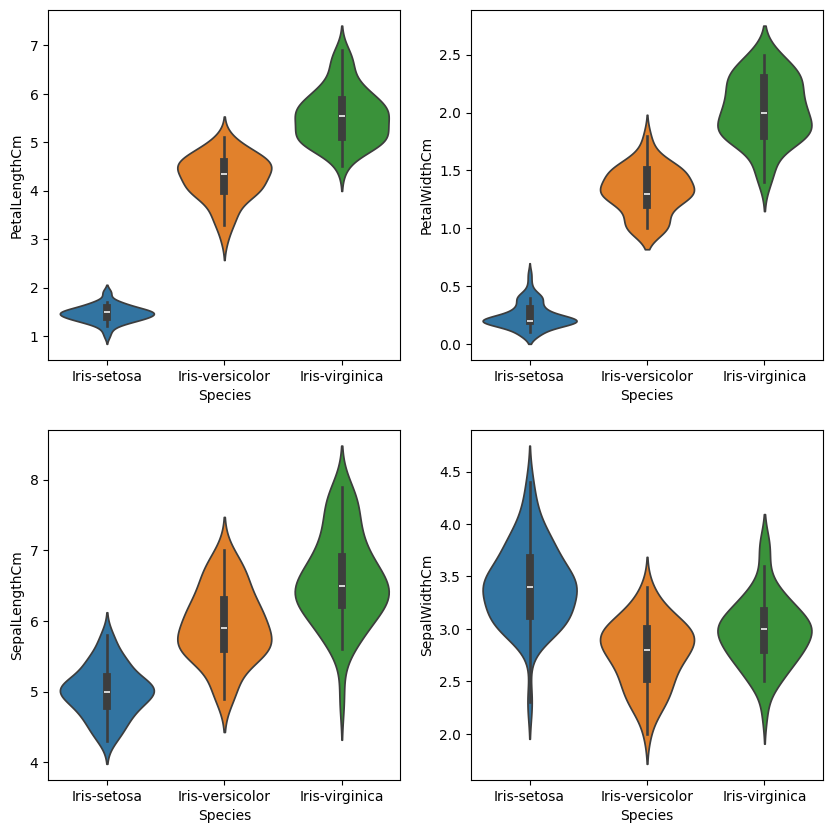

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(223)
sns.violinplot(x='Species', y='SepalLengthCm', data=df, hue='Species')

plt.subplot(224)
sns.violinplot(x='Species', y='SepalWidthCm', data=df, hue='Species')

plt.subplot(221)
sns.violinplot(x='Species', y='PetalLengthCm', data=df, hue='Species')

plt.subplot(222)
sns.violinplot(x='Species', y='PetalWidthCm', data=df, hue='Species')

In [21]:
?sns.pairplot

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

/home/max/Udemy/Udemy/machine_learning_classification_bootcamp_in_python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/max/Udemy/Udemy/machine_learning_classification_bootcamp_in_python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/max/Udemy/Udemy/machine_learning_classification_bootcamp_in_python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/max/Udemy/Udemy/machine_learning_classification_bootcamp_in_python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/max/Udemy/Udemy/machin

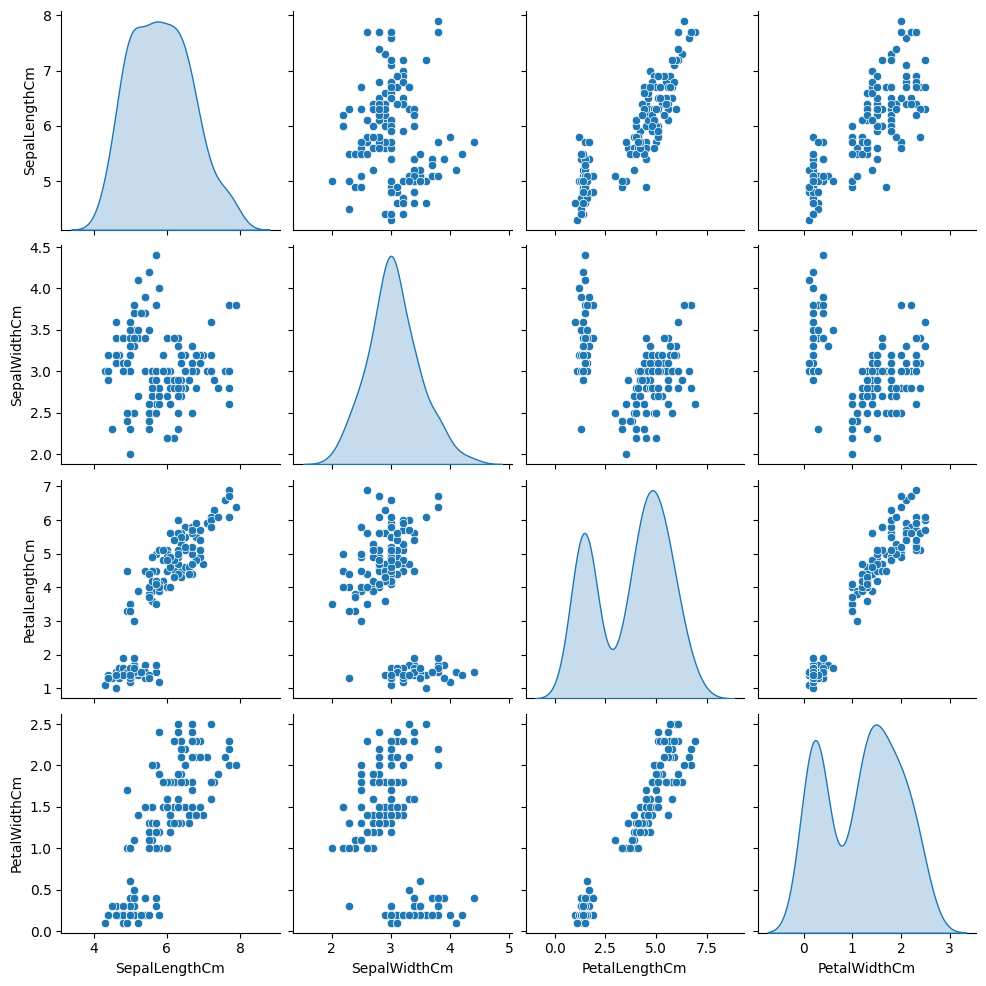

In [22]:
vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
sns.pairplot(vars=vars, data=df, kind='scatter', diag_kind='kde', palette='Reds')

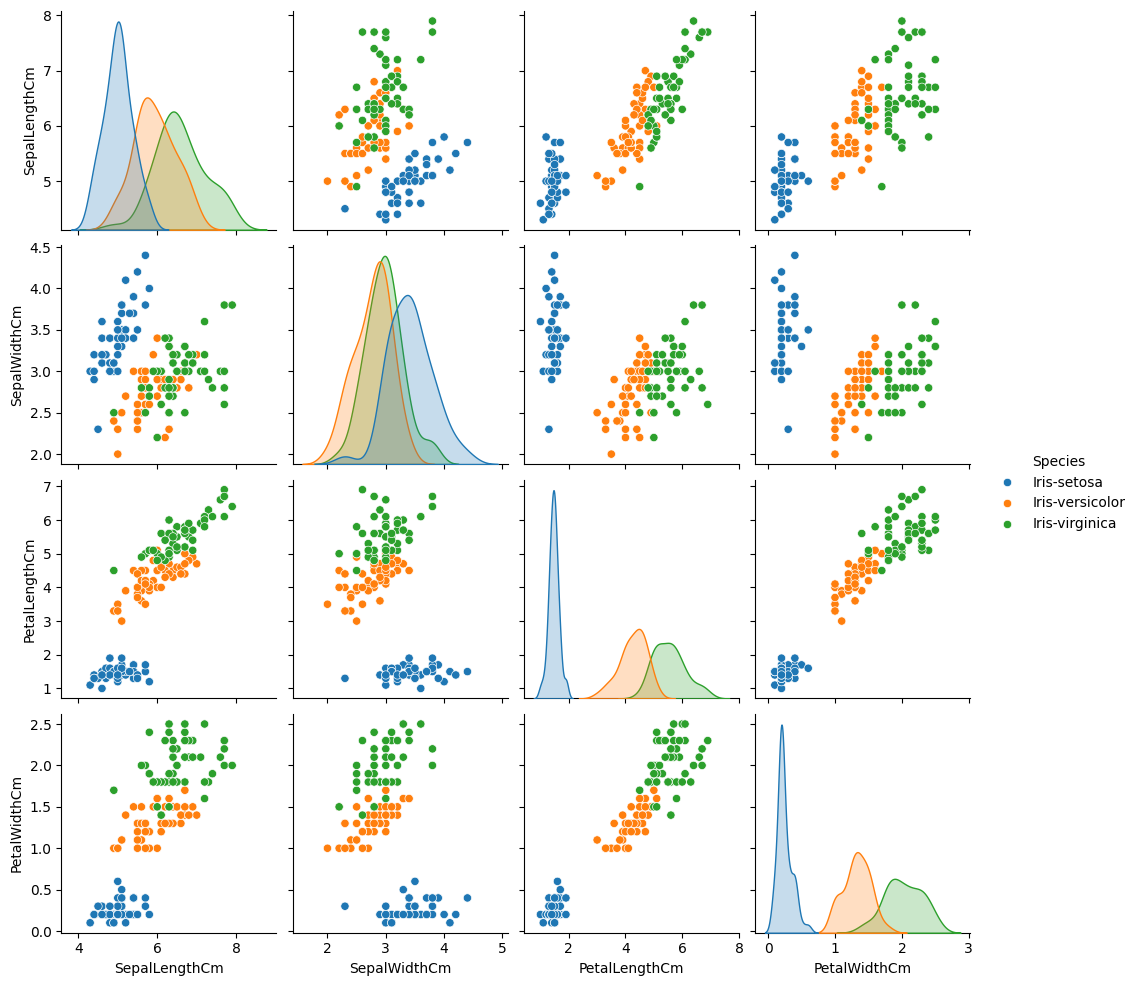

In [23]:
sns.pairplot(df, hue="Species")

In [24]:
# Let's try the Seaborn pairplot


In [25]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [26]:
?df.drop

Signature:
df.drop(
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by directly specifying index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the :ref:`user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or list

In [27]:
?sns.heatmap

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

<Axes: >

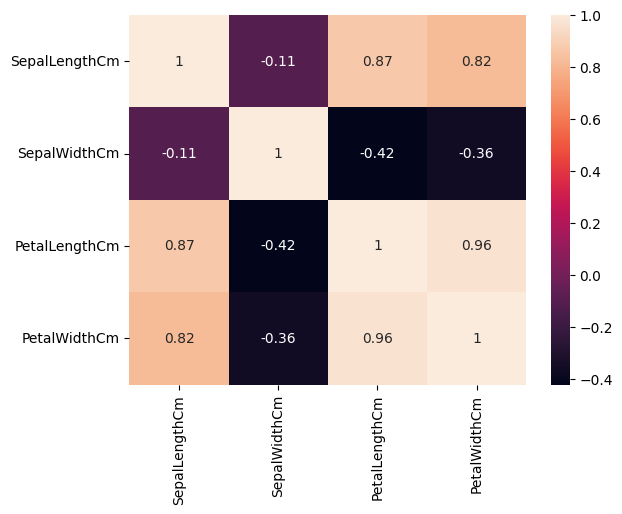

In [28]:
sns.heatmap(df.drop(['Species'], axis=1).corr(), annot=True )

In [29]:
# Let's check the correlation between the variables 



# STEP #3: DATA CLEANING

In [30]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [31]:
X = df.drop('Species', axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
# Let's drop the ID and Species (target label) coloumns


In [33]:
y = df.Species
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [34]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split, GridSearchCV


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [37]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [38]:
y_train.head()

137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
Name: Species, dtype: object

# STEP #4: TRAINING THE MODEL

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [41]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [42]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
# Fitting K-NN to the Training set


# STEP #5: EVALUATING THE MODEL

In [44]:
y_test_predict = classifier.predict(X_test)
y_test_predict

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

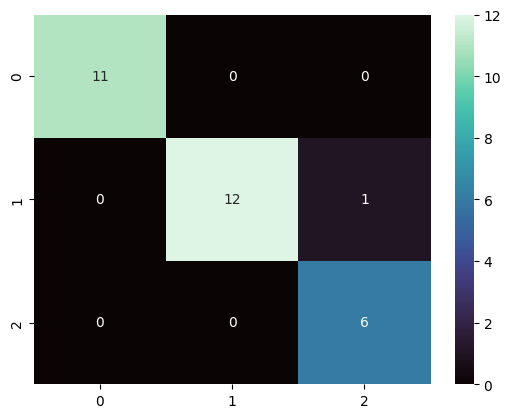

In [46]:
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, annot=True, cmap='mako')

In [47]:
print(classification_report(y_test, y_test_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [50]:
classifier1 = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p = 2)
classifier2=KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
classifier3=KNeighborsClassifier(n_neighbors=9, metric='minkowski',p=2)
classifier4=KNeighborsClassifier(n_neighbors=11, metric='minkowski',p=2)

In [51]:
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)
classifier3.fit(X_train, y_train)
classifier4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [52]:
y_test_pred3 = classifier1.predict(X_test)
y_test_pred7=classifier2.predict(X_test)
y_test_pred9=classifier3.predict(X_test)
y_test_pred11=classifier4.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

Text(0.5, 1.0, '11 neighbors')

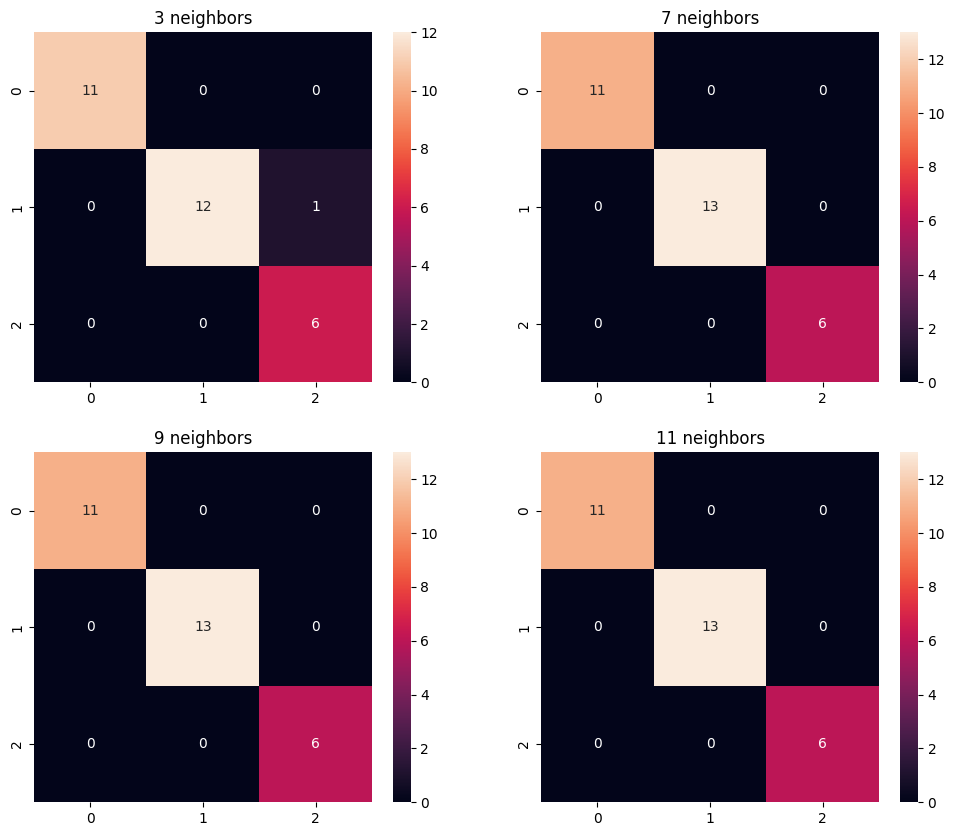

In [54]:
plt.figure(figsize=(12,10))
plt.subplot(221)
cm3=confusion_matrix(y_test, y_test_pred3)
sns.heatmap(cm3, annot=True)
plt.title('3 neighbors')

plt.subplot(222)
cm7=confusion_matrix(y_test, y_test_pred7)
sns.heatmap(cm7, annot=True)
plt.title('7 neighbors')

plt.subplot(223)
sns.heatmap(confusion_matrix(y_test, y_test_pred9), annot=True)
plt.title('9 neighbors')

plt.subplot(224)
sns.heatmap(confusion_matrix(y_test, y_test_pred11), annot=True)
plt.title('11 neighbors')

In [55]:
X_test.values[:,0]

array([5.8, 6. , 5.5, 7.3, 5. , 6.3, 5. , 6.7, 6.8, 6.1, 6.1, 6.4, 6.1,
       6.5, 6.1, 4.9, 6. , 5.5, 4.8, 5.4, 5.6, 5.6, 4.8, 4.4, 6.2, 4.6,
       5.1, 6.2, 5. , 5. ])

In [56]:
from matplotlib.colors import ListedColormap

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
X_knn = X_train.values[:,:2]
X_knn

array([[6.4, 3.1],
       [5.4, 3. ],
       [5.2, 3.5],
       [6.1, 3. ],
       [6.4, 2.8],
       [5.2, 2.7],
       [5.7, 3.8],
       [6. , 2.7],
       [5.9, 3. ],
       [5.8, 2.6],
       [6.8, 3. ],
       [4.7, 3.2],
       [6.9, 3.1],
       [5. , 3.5],
       [5.4, 3.7],
       [5. , 2. ],
       [6.5, 3. ],
       [6.7, 3.3],
       [6. , 2.2],
       [6.7, 2.5],
       [5.6, 2.5],
       [7.7, 3. ],
       [6.3, 3.3],
       [5.5, 2.4],
       [6.3, 2.7],
       [6.3, 2.8],
       [4.9, 2.5],
       [6.3, 2.5],
       [7. , 3.2],
       [6.5, 3. ],
       [6. , 3.4],
       [4.8, 3.1],
       [5.8, 2.7],
       [5.6, 2.7],
       [5.6, 2.9],
       [5.5, 2.5],
       [6.1, 3. ],
       [7.2, 3.2],
       [5.3, 3.7],
       [4.3, 3. ],
       [6.4, 2.7],
       [5.7, 3. ],
       [5.4, 3.4],
       [5.7, 4.4],
       [6.9, 3.1],
       [4.6, 3.1],
       [5.9, 3. ],
       [5.1, 2.5],
       [4.6, 3.4],
       [6.2, 2.2],
       [7.2, 3.6],
       [5.7, 2.9],
       [4.8,

In [59]:
classifier2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier2.fit(X_knn, y_train)

KNeighborsClassifier()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

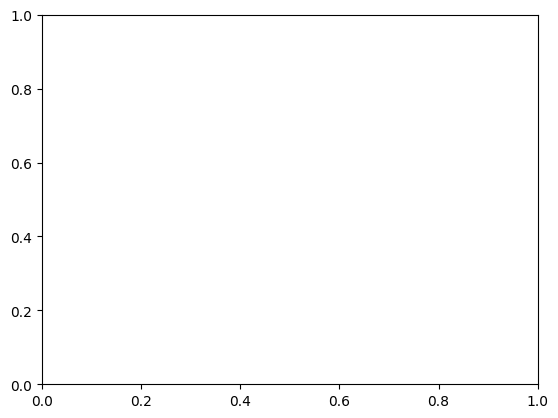

In [60]:
X_set, y_set = X_knn, y_test

X1, X2= np.meshgrid(
                    np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start=X_set[:,1].min() - 1, stop=X_set[:,1].max() + 1, step = 0.01)
)

plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('green', 'red')))

In [119]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [120]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

# EXCELLENT JOB! NOW YOU BECAME EXPERT IN K-NEAREST NEIGHBORS, KEEP UP THE GOOD WORK!

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [62]:
from matplotlib.colors import ListedColormap

In [70]:
?df.drop

Signature:
df.drop(
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by directly specifying index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the :ref:`user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or list

In [72]:
X2 = df.drop(columns ='Species', axis=1)
X2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [74]:
from sklearn.preprocessing import LabelEncoder

In [77]:
y= df.Species
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [116]:
le = LabelEncoder()
y = le.fit_transform(y)
y[:5]

array([0, 0, 0, 0, 0])

In [81]:
df.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [82]:
type(X2)

pandas.core.frame.DataFrame

In [90]:
X2 =df.drop('Species', axis=1)
X2.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=5)

In [92]:
X_train2.shape, y_train2.shape, X_test2.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [93]:
X_train2[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
79,5.7,2.6,3.5,1.0
10,5.4,3.7,1.5,0.2
50,7.0,3.2,4.7,1.4


In [117]:
y_train

137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: Species, Length: 120, dtype: object

In [94]:
type(X_train2)

pandas.core.frame.DataFrame

In [97]:
X_train2D = X_train2.iloc[:,:2].values
X_train2D[:5]

array([[5.1, 3.4],
       [5.5, 2.3],
       [5.7, 2.6],
       [5.4, 3.7],
       [7. , 3.2]])

In [101]:
X_test2D = X_test.iloc[:,:2].values
X_test2D[:5]

array([[5.8, 2.8],
       [6. , 2.2],
       [5.5, 4.2],
       [7.3, 2.9],
       [5. , 3.4]])

In [102]:
from sklearn.naive_bayes import MultinomialNB

In [104]:
from matplotlib.colors import ListedColormap

In [121]:
y_train

137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: Species, Length: 120, dtype: object

In [122]:
y_train2

array([0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1,
       1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0,
       0, 1, 2, 0, 2, 0, 1, 2, 2, 1])

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

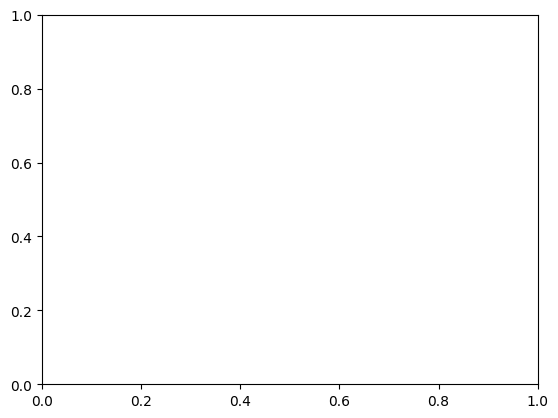

In [120]:
#Error because the y_train, should use y_train2 instead
NB = MultinomialNB()
NB.fit(X_train2D, y_train)
y_train_predict = NB.predict(X_train2D)

X_set, y_set = X_train2D, y_train

X1, X2 = np.meshgrid(
                    np.arange(start=X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step =0.01),
                    np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max() + 1, step=0.01)
)

plt.contourf(X1, X2, NB.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('green', 'red', 'blue')))

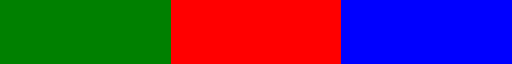

In [123]:
ListedColormap(('green', 'red', 'blue'))

In [128]:
ListedColormap(('green', 'red', 'blue'))(0)

(np.float64(0.0),
 np.float64(0.5019607843137255),
 np.float64(0.0),
 np.float64(1.0))

In [130]:
y_train2

array([0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1,
       1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0,
       0, 1, 2, 0, 2, 0, 1, 2, 2, 1])

In [131]:
y_test2

array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

/tmp/ipykernel_22501/61050864.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train2D[y_train2 == j, 0], X_train2D[y_train2 == j,1], c=ListedColormap(('green', 'red', 'blue'))(i), label=j)


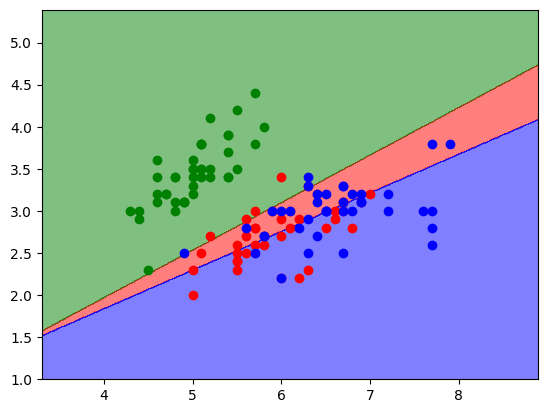

In [132]:
NB = MultinomialNB()
NB.fit(X_train2D, y_train2)
y_train_predict = NB.predict(X_train2D)

X_set, y_set = X_train2D, y_train

X1, X2 = np.meshgrid(
                    np.arange(start=X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step =0.01),
                    np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max() + 1, step=0.01)
)

plt.contourf(X1, X2, NB.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('green', 'red', 'blue')))

for i, j in enumerate(np.unique(y_train2)):
    plt.scatter(X_train2D[y_train2 == j, 0], X_train2D[y_train2 == j,1], c=ListedColormap(('green', 'red', 'blue'))(i), label=j)

In [ ]:
X_test2

In [137]:
X_train2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
79,5.7,2.6,3.5,1.0
10,5.4,3.7,1.5,0.2
50,7.0,3.2,4.7,1.4
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [140]:
X_train2[:,:2]

InvalidIndexError: (slice(None, None, None), slice(None, 2, None))

In [141]:
X_train2D[:, :2]

array([[5.1, 3.4],
       [5.5, 2.3],
       [5.7, 2.6],
       [5.4, 3.7],
       [7. , 3.2],
       [5. , 3.3],
       [5. , 3.5],
       [7.7, 3. ],
       [5. , 3.5],
       [6.4, 3.2],
       [5.8, 2.7],
       [5.6, 2.5],
       [5.1, 3.5],
       [5.1, 3.8],
       [6.5, 2.8],
       [6.2, 2.8],
       [5.9, 3. ],
       [6.7, 3.3],
       [7.7, 3.8],
       [5.4, 3.4],
       [6.3, 2.5],
       [5. , 3.2],
       [4.6, 3.4],
       [5.7, 4.4],
       [5.2, 3.4],
       [6.2, 2.9],
       [6.3, 3.3],
       [5.5, 2.4],
       [5.1, 2.5],
       [5.9, 3. ],
       [5. , 2. ],
       [6.5, 3. ],
       [6.5, 3. ],
       [6.9, 3.1],
       [4.6, 3.6],
       [6.6, 3. ],
       [4.9, 3.1],
       [6.7, 3. ],
       [6.7, 3. ],
       [5.6, 2.9],
       [6.3, 3.4],
       [5.6, 2.7],
       [6.1, 3. ],
       [6.3, 2.3],
       [5.8, 2.6],
       [5.7, 3. ],
       [6.9, 3.1],
       [6.8, 2.8],
       [5.2, 4.1],
       [5.8, 2.7],
       [4.3, 3. ],
       [4.8, 3.4],
       [5.2,

In [138]:
X_train2D

array([[5.1, 3.4],
       [5.5, 2.3],
       [5.7, 2.6],
       [5.4, 3.7],
       [7. , 3.2],
       [5. , 3.3],
       [5. , 3.5],
       [7.7, 3. ],
       [5. , 3.5],
       [6.4, 3.2],
       [5.8, 2.7],
       [5.6, 2.5],
       [5.1, 3.5],
       [5.1, 3.8],
       [6.5, 2.8],
       [6.2, 2.8],
       [5.9, 3. ],
       [6.7, 3.3],
       [7.7, 3.8],
       [5.4, 3.4],
       [6.3, 2.5],
       [5. , 3.2],
       [4.6, 3.4],
       [5.7, 4.4],
       [5.2, 3.4],
       [6.2, 2.9],
       [6.3, 3.3],
       [5.5, 2.4],
       [5.1, 2.5],
       [5.9, 3. ],
       [5. , 2. ],
       [6.5, 3. ],
       [6.5, 3. ],
       [6.9, 3.1],
       [4.6, 3.6],
       [6.6, 3. ],
       [4.9, 3.1],
       [6.7, 3. ],
       [6.7, 3. ],
       [5.6, 2.9],
       [6.3, 3.4],
       [5.6, 2.7],
       [6.1, 3. ],
       [6.3, 2.3],
       [5.8, 2.6],
       [5.7, 3. ],
       [6.9, 3.1],
       [6.8, 2.8],
       [5.2, 4.1],
       [5.8, 2.7],
       [4.3, 3. ],
       [4.8, 3.4],
       [5.2,

In [143]:
X_test2D

array([[5.8, 2.8],
       [6. , 2.2],
       [5.5, 4.2],
       [7.3, 2.9],
       [5. , 3.4],
       [6.3, 3.3],
       [5. , 3.5],
       [6.7, 3.1],
       [6.8, 2.8],
       [6.1, 2.8],
       [6.1, 2.6],
       [6.4, 3.2],
       [6.1, 2.8],
       [6.5, 2.8],
       [6.1, 2.9],
       [4.9, 3.1],
       [6. , 2.9],
       [5.5, 2.6],
       [4.8, 3. ],
       [5.4, 3.9],
       [5.6, 2.8],
       [5.6, 3. ],
       [4.8, 3.4],
       [4.4, 2.9],
       [6.2, 2.8],
       [4.6, 3.6],
       [5.1, 3.8],
       [6.2, 2.9],
       [5. , 2.3],
       [5. , 3.4]])

In [148]:
X_test2D

array([[5.8, 2.8],
       [6. , 2.2],
       [5.5, 4.2],
       [7.3, 2.9],
       [5. , 3.4],
       [6.3, 3.3],
       [5. , 3.5],
       [6.7, 3.1],
       [6.8, 2.8],
       [6.1, 2.8],
       [6.1, 2.6],
       [6.4, 3.2],
       [6.1, 2.8],
       [6.5, 2.8],
       [6.1, 2.9],
       [4.9, 3.1],
       [6. , 2.9],
       [5.5, 2.6],
       [4.8, 3. ],
       [5.4, 3.9],
       [5.6, 2.8],
       [5.6, 3. ],
       [4.8, 3.4],
       [4.4, 2.9],
       [6.2, 2.8],
       [4.6, 3.6],
       [5.1, 3.8],
       [6.2, 2.9],
       [5. , 2.3],
       [5. , 3.4]])

/tmp/ipykernel_22501/2582503206.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


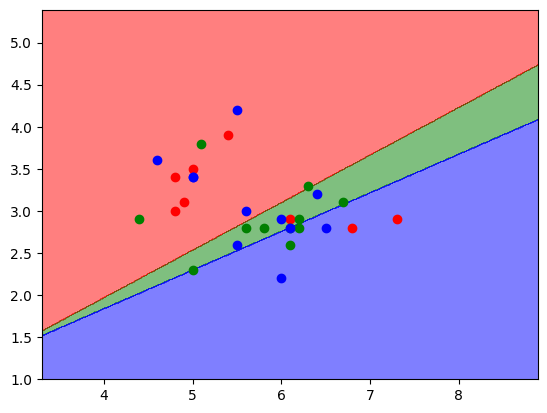

In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train2D, y_train2)
y_test2_predict = MNB.predict(X_test2D)

from matplotlib.colors import ListedColormap

X_set, y_set = X_train2D, y_train2

start1 = X_set[:,0].min() - 1
stop1 = X_set[:,0].max() + 1
start2 = X_set[:,1].min() - 1
stop2 = X_set[:,1].max() + 1
step=0.01

X1, X2 = np.meshgrid(
                    np.arange(start=start1, stop=stop1, step=step),
                    np.arange(start=start2, stop=stop2, step=step)
)

Xarrays = np.array([X1.ravel(), X2.ravel()])
predictions = MNB.predict(Xarrays.T)
plt.contourf(X1, X2, predictions.reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('red', 'green', 'blue')))

for i, j in enumerate(np.unique(y_test2)):
    xi = X_test2D[y_test2==j, 0]
    yi = X_test2D[y_test2==j, 1]
    plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)



/tmp/ipykernel_22501/2155349106.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


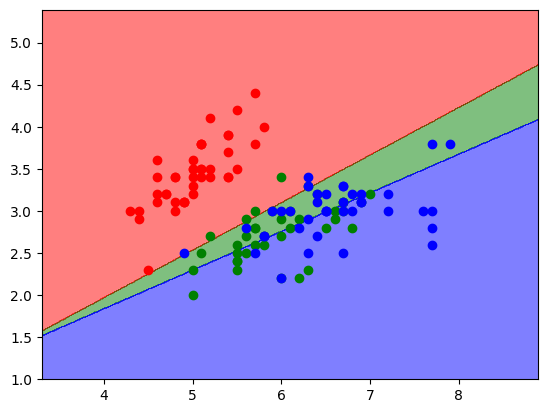

In [150]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train2D, y_train2)
y_test2_predict = MNB.predict(X_test2D)

from matplotlib.colors import ListedColormap

X_set, y_set = X_train2D, y_train2

start1 = X_set[:,0].min() - 1
stop1 = X_set[:,0].max() + 1
start2 = X_set[:,1].min() - 1
stop2 = X_set[:,1].max() + 1
step=0.01

X1, X2 = np.meshgrid(
                    np.arange(start=start1, stop=stop1, step=step),
                    np.arange(start=start2, stop=stop2, step=step)
)

Xarrays = np.array([X1.ravel(), X2.ravel()])
predictions = MNB.predict(Xarrays.T)
plt.contourf(X1, X2, predictions.reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('red', 'green', 'blue')))

for i, j in enumerate(np.unique(y_set)):
    xi = X_set[y_set==j, 0]
    yi = X_set[y_set==j, 1]
    plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)



In [152]:
X_train2D.shape, y_train2.shape

((120, 2), (120,))

In [154]:
ListedColormap(('red', 'green', 'blue'))(0)

(np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0))

In [155]:
ListedColormap(('red', 'green', 'blue'))(1)

(np.float64(0.0),
 np.float64(0.5019607843137255),
 np.float64(0.0),
 np.float64(1.0))

In [151]:
from sklearn.naive_bayes import GaussianNB

In [157]:
np.unique(y_set)

array([0, 1, 2])

/tmp/ipykernel_22501/452505837.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


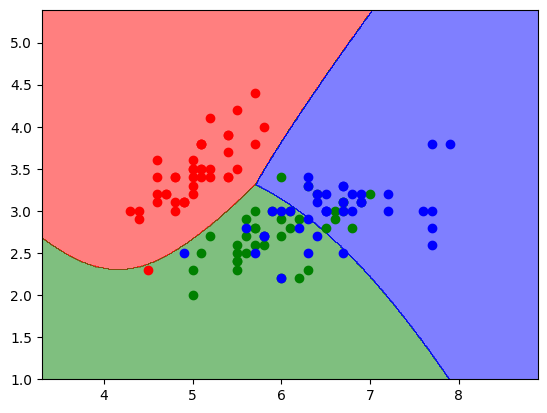

In [162]:
GNB = GaussianNB()
GNB.fit(X_train2D, y_train2)
y_train2_predict = GNB.predict(X_train2D)

from matplotlib.colors import ListedColormap

X_set, y_set = X_train2D, y_train2
X1, X2 = np.meshgrid(
            np.arange(start=start1, stop=stop1, step=step),
            np.arange(start=start2, stop=stop2, step=step)
)

transposed_array = np.array([X1.ravel(), X2.ravel()]).T
predictions = GNB.predict(transposed_array).reshape(X1.shape)
plt.contourf(X1, X2, predictions, alpha=0.5, cmap=ListedColormap(('red', 'green', 'blue')))

for i, j in enumerate(np.unique(y_set)):
    # print(i, j)
    xi = X_set[y_set==j, 0]
    yi = X_set[y_set==j, 1]
    plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)



/tmp/ipykernel_22501/4235761047.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


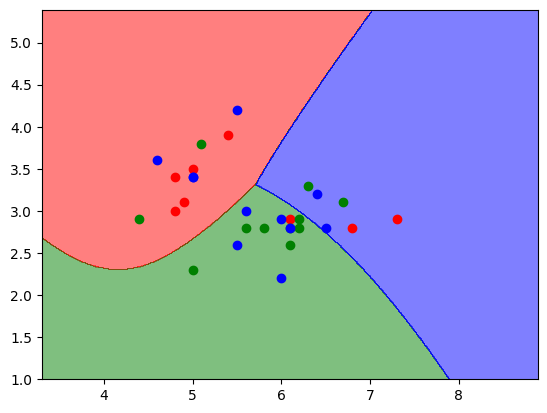

In [163]:
GNB = GaussianNB()
GNB.fit(X_train2D, y_train2)
y_train2_predict = GNB.predict(X_train2D)

from matplotlib.colors import ListedColormap

X_set, y_set = X_train2D, y_train2
X1, X2 = np.meshgrid(
            np.arange(start=start1, stop=stop1, step=step),
            np.arange(start=start2, stop=stop2, step=step)
)

transposed_array = np.array([X1.ravel(), X2.ravel()]).T
predictions = GNB.predict(transposed_array).reshape(X1.shape)
plt.contourf(X1, X2, predictions, alpha=0.5, cmap=ListedColormap(('red', 'green', 'blue')))


X_set, y_set = X_test2D, y_test2
for i, j in enumerate(np.unique(y_set)):
    # print(i, j)
    xi = X_set[y_set==j, 0]
    yi = X_set[y_set==j, 1]
    plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)



In [165]:
from sklearn.linear_model import LogisticRegression, Perceptron

/tmp/ipykernel_22501/1528805838.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


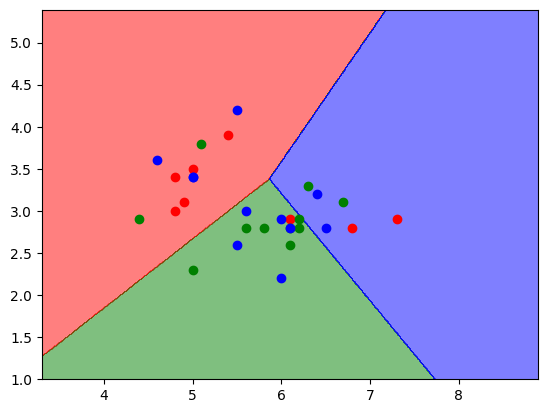

In [167]:
LR = LogisticRegression()
LR.fit(X_train2D, y_train2)
y_train2_predict = LR.predict(X_train2D)

from matplotlib.colors import ListedColormap

X_set, y_set = X_train2D, y_train2
X1, X2 = np.meshgrid(
            np.arange(start=start1, stop=stop1, step=step),
            np.arange(start=start2, stop=stop2, step=step)
)

transposed_array = np.array([X1.ravel(), X2.ravel()]).T
predictions = LR.predict(transposed_array).reshape(X1.shape)
plt.contourf(X1, X2, predictions, alpha=0.5, cmap=ListedColormap(('red', 'green', 'blue')))


X_set, y_set = X_test2D, y_test2
for i, j in enumerate(np.unique(y_set)):
    # print(i, j)
    xi = X_set[y_set==j, 0]
    yi = X_set[y_set==j, 1]
    plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)



In [168]:
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization. The 'liblinear' solver
supports both L1 and L2 regularization, with a dual formulation only for


In [169]:
from sklearn.svm import SVC

/tmp/ipykernel_22501/3808450350.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


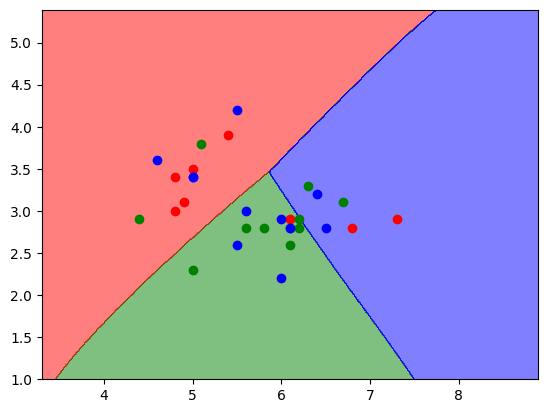

In [170]:
model= SVC()
model.fit(X_train2D, y_train2)
y_train2_predict = model.predict(X_train2D)

from matplotlib.colors import ListedColormap

X_set, y_set = X_train2D, y_train2
X1, X2 = np.meshgrid(
            np.arange(start=start1, stop=stop1, step=step),
            np.arange(start=start2, stop=stop2, step=step)
)

transposed_array = np.array([X1.ravel(), X2.ravel()]).T
predictions = model.predict(transposed_array).reshape(X1.shape)
plt.contourf(X1, X2, predictions, alpha=0.5, cmap=ListedColormap(('red', 'green', 'blue')))


X_set, y_set = X_test2D, y_test2
for i, j in enumerate(np.unique(y_set)):
    # print(i, j)
    xi = X_set[y_set==j, 0]
    yi = X_set[y_set==j, 1]
    plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)



In [171]:
?SVC

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

/tmp/ipykernel_22501/2099194312.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


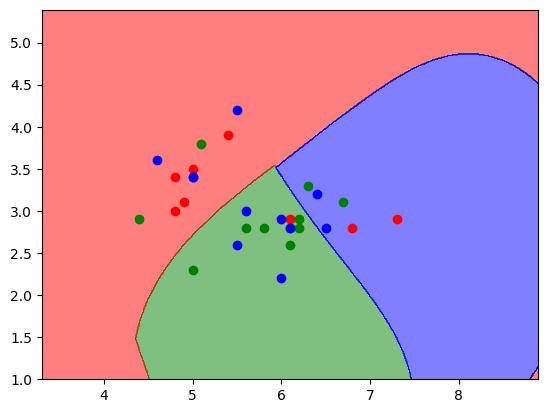

In [173]:
model= SVC(kernel='rbf', C=10)
model.fit(X_train2D, y_train2)
y_train2_predict = model.predict(X_train2D)

from matplotlib.colors import ListedColormap

X_set, y_set = X_train2D, y_train2
X1, X2 = np.meshgrid(
            np.arange(start=start1, stop=stop1, step=step),
            np.arange(start=start2, stop=stop2, step=step)
)

transposed_array = np.array([X1.ravel(), X2.ravel()]).T
predictions = model.predict(transposed_array).reshape(X1.shape)
plt.contourf(X1, X2, predictions, alpha=0.5, cmap=ListedColormap(('red', 'green', 'blue')))


X_set, y_set = X_test2D, y_test2
for i, j in enumerate(np.unique(y_set)):
    # print(i, j)
    xi = X_set[y_set==j, 0]
    yi = X_set[y_set==j, 1]
    plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)



In [175]:
?SVC

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

In [176]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

/tmp/ipykernel_22501/4268123324.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


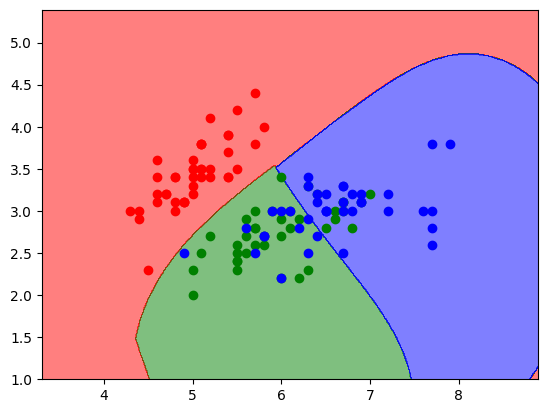

In [174]:
model= SVC(kernel='rbf', C=10)
model.fit(X_train2D, y_train2)
y_train2_predict = model.predict(X_train2D)

from matplotlib.colors import ListedColormap

X_set, y_set = X_train2D, y_train2
X1, X2 = np.meshgrid(
            np.arange(start=start1, stop=stop1, step=step),
            np.arange(start=start2, stop=stop2, step=step)
)

transposed_array = np.array([X1.ravel(), X2.ravel()]).T
predictions = model.predict(transposed_array).reshape(X1.shape)
plt.contourf(X1, X2, predictions, alpha=0.5, cmap=ListedColormap(('red', 'green', 'blue')))


X_set, y_set = X_train2D, y_train2
for i, j in enumerate(np.unique(y_set)):
    # print(i, j)
    xi = X_set[y_set==j, 0]
    yi = X_set[y_set==j, 1]
    plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)



/tmp/ipykernel_22501/3303083673.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


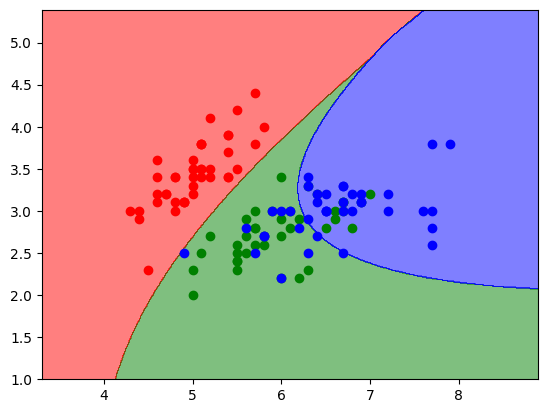

In [178]:
model= SVC(kernel='poly', C=100)
model.fit(X_train2D, y_train2)
y_train2_predict = model.predict(X_train2D)

from matplotlib.colors import ListedColormap

X_set, y_set = X_train2D, y_train2
X1, X2 = np.meshgrid(
            np.arange(start=start1, stop=stop1, step=step),
            np.arange(start=start2, stop=stop2, step=step)
)

transposed_array = np.array([X1.ravel(), X2.ravel()]).T
predictions = model.predict(transposed_array).reshape(X1.shape)
plt.contourf(X1, X2, predictions, alpha=0.5, cmap=ListedColormap(('red', 'green', 'blue')))


X_set, y_set = X_train2D, y_train2
for i, j in enumerate(np.unique(y_set)):
    # print(i, j)
    xi = X_set[y_set==j, 0]
    yi = X_set[y_set==j, 1]
    plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)



/tmp/ipykernel_22501/3339566296.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


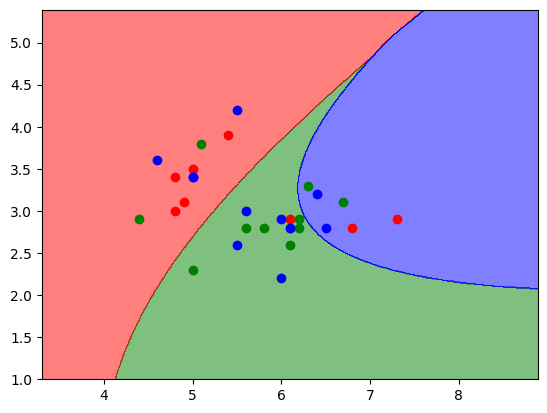

In [179]:
model= SVC(kernel='poly', C=100)
model.fit(X_train2D, y_train2)
y_train2_predict = model.predict(X_train2D)

from matplotlib.colors import ListedColormap

X_set, y_set = X_train2D, y_train2
X1, X2 = np.meshgrid(
            np.arange(start=start1, stop=stop1, step=step),
            np.arange(start=start2, stop=stop2, step=step)
)

transposed_array = np.array([X1.ravel(), X2.ravel()]).T
predictions = model.predict(transposed_array).reshape(X1.shape)
plt.contourf(X1, X2, predictions, alpha=0.5, cmap=ListedColormap(('red', 'green', 'blue')))


X_set, y_set = X_test2D, y_test2
for i, j in enumerate(np.unique(y_set)):
    # print(i, j)
    xi = X_set[y_set==j, 0]
    yi = X_set[y_set==j, 1]
    plt.scatter(xi, yi, c=ListedColormap(('red', 'green', 'blue'))(i), label=j)



In [180]:
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

In [181]:
colors[:2]

('red', 'blue')

In [183]:
np.unique(y_train2)

array([0, 1, 2])

In [184]:
colors[:len(np.unique(y_train2))]

('red', 'blue', 'lightgreen')

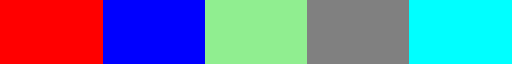

In [185]:
ListedColormap(colors)

In [190]:
colors[:len(np.unique(y_train2))]

('red', 'blue', 'lightgreen')

In [195]:
colors[:len(np.unique(y_train2))]

('red', 'blue', 'lightgreen')

In [200]:
[:3]

SyntaxError: invalid syntax (1881118149.py, line 1)

In [202]:
colors[:len(np.unique(y_train2))]

('red', 'blue', 'lightgreen')

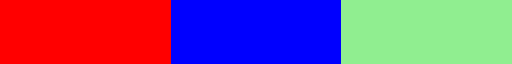

In [204]:
ListedColormap(colors[:len(np.unique(y_train2))])

/tmp/ipykernel_22501/3696957060.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x_comp,


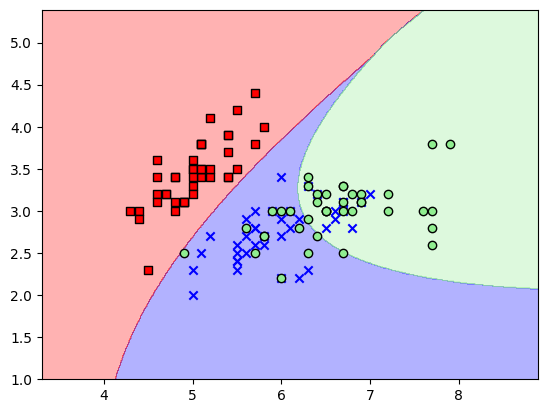

In [218]:
X_set, y_set = X_train2D, y_train2
resolution = 0.01
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap=ListedColormap(colors[:len(np.unique(y_train2))])
markers = ('s', 'x', 'o', '^', 'v')


X1_min, X1_max = X_set[:,0].min() -1, X_set[:,0].max() + 1
X2_min, X2_max = X_set[:,1].min() -1, X_set[:,1].max() + 1

X1, X2 = np.meshgrid(
                    np.arange(X1_min, X1_max, resolution),
                    np.arange(X2_min, X2_max, resolution)
)

Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.3, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    x_comp = X_set[y_set==j, 0]
    y_comp = X_set[y_set==j, 1]
    plt.scatter(x=x_comp, 
                y=y_comp,
                c=colors[i],
                label=j,
                edgecolor='k',
                marker=markers[i])

In [112]:
from sklearn.naive_bayes import GaussianNB

In [115]:
y_train.unique()

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

/tmp/ipykernel_22501/1013405041.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_train2==j,0], X_set[y_train2==j,1], c=ListedColormap(('green', 'red', 'blue'))(i), label=j)


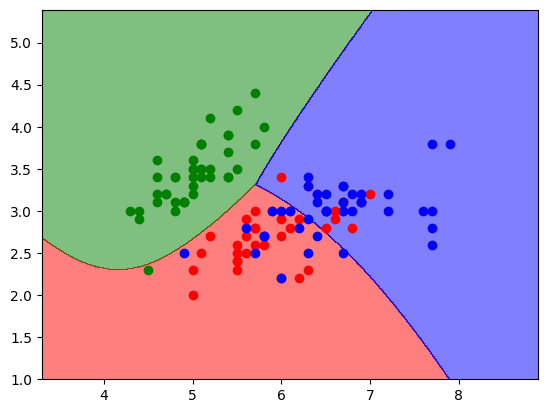

In [133]:
NB = GaussianNB()
NB.fit(X_train2D, y_train2)
y_train_predict = NB.predict(X_train2D)

X_set, y_set = X_train2D, y_train2

X1, X2 = np.meshgrid(
                    np.arange(start=X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step =0.01),
                    np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max() + 1, step=0.01)
)

plt.contourf(X1, X2, NB.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('green', 'red', 'blue')))

for i,j in enumerate(np.unique(y_train2)):
    plt.scatter(X_set[y_train2==j,0], X_set[y_train2==j,1], c=ListedColormap(('green', 'red', 'blue'))(i), label=j)